In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# importando o dataset
from sklearn.datasets import fetch_california_housing
casas = fetch_california_housing()

In [4]:
# transformando em um DataFrame
casas_df = pd.DataFrame(casas.data)
casas_df.columns = casas.feature_names
casas_df['MedHouseVal'] = casas.target

In [5]:
# separando X e Y
X = casas_df.MedInc
y = casas_df.MedHouseVal

# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
# usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1, 1),y_train)
y_pred = reg.predict(X_test.values.reshape(-1,1))

In [11]:
# Avaliando o erro
absol_error = mean_absolute_error(y_test,y_pred)
squar_error = mean_squared_error(y_test,y_pred)
print(f"""
Mean Absolute Error: {absol_error}
Mean Squared Error: {squar_error}
""")


Mean Absolute Error: 0.6265986453094173
Mean Squared Error: 0.7028461448540977


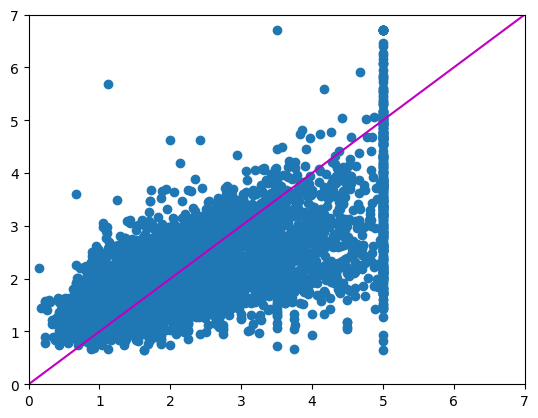

In [12]:
# Podemos visualizar graficamente a relação do nosso valor target com o valor previsto
fig,ax = plt.subplots()

ax.scatter(y_test,y_pred)
ax.plot([0,7],[0,7],'m')

ax.set(xlim=(0,7),ylim=(0,7))

plt.show()